In [6]:
import pandas as pd
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from skimage.io import imread, imsave

In [8]:
import os

In [16]:
data_folder = '../data'
images_folder = os.path.join(data_folder,'new_roof_images/resampled')
ids = pd.read_csv('../data/new_roof_images/id_train_resampled.csv')

In [17]:
def open_image_id(image_id):
    img_name = str(image_id)
    image_path = os.path.join(images_folder,img_name+".jpg")
    image = imread(image_path)
    return image

In [83]:
import itertools

def view_grid_images(a,b, images_dict, imshow_args={}, **kwargs):
    fig, axes = plt.subplots(a,b, **kwargs)
    # iloczyn kartezjanski, zeby przeiterowac po gridzie plotu
    grid_list = list(itertools.product(*[range(a), range(b)]))
    for grid_coord, image_data in zip(grid_list, images_dict.iteritems()):
        Id, (img, label) = image_data
        x,y = grid_coord
        ax = axes[x][y]
        ax.imshow(img, **imshow_args)
        ax.set_xlabel(label)
    fig.tight_layout()
    
def get_random_dict(n):
    new_ids = ids.sample(n)
    images_dict = {Id: (open_image_id(Id),label) for  ind, (Id, label) in new_ids.iterrows()}
    return images_dict

def view_random_samples(a,b, ids, **kwargs):
    images_dict = get_random_dict(a*b)
    view_grid_images(a,b, images_dict)
        

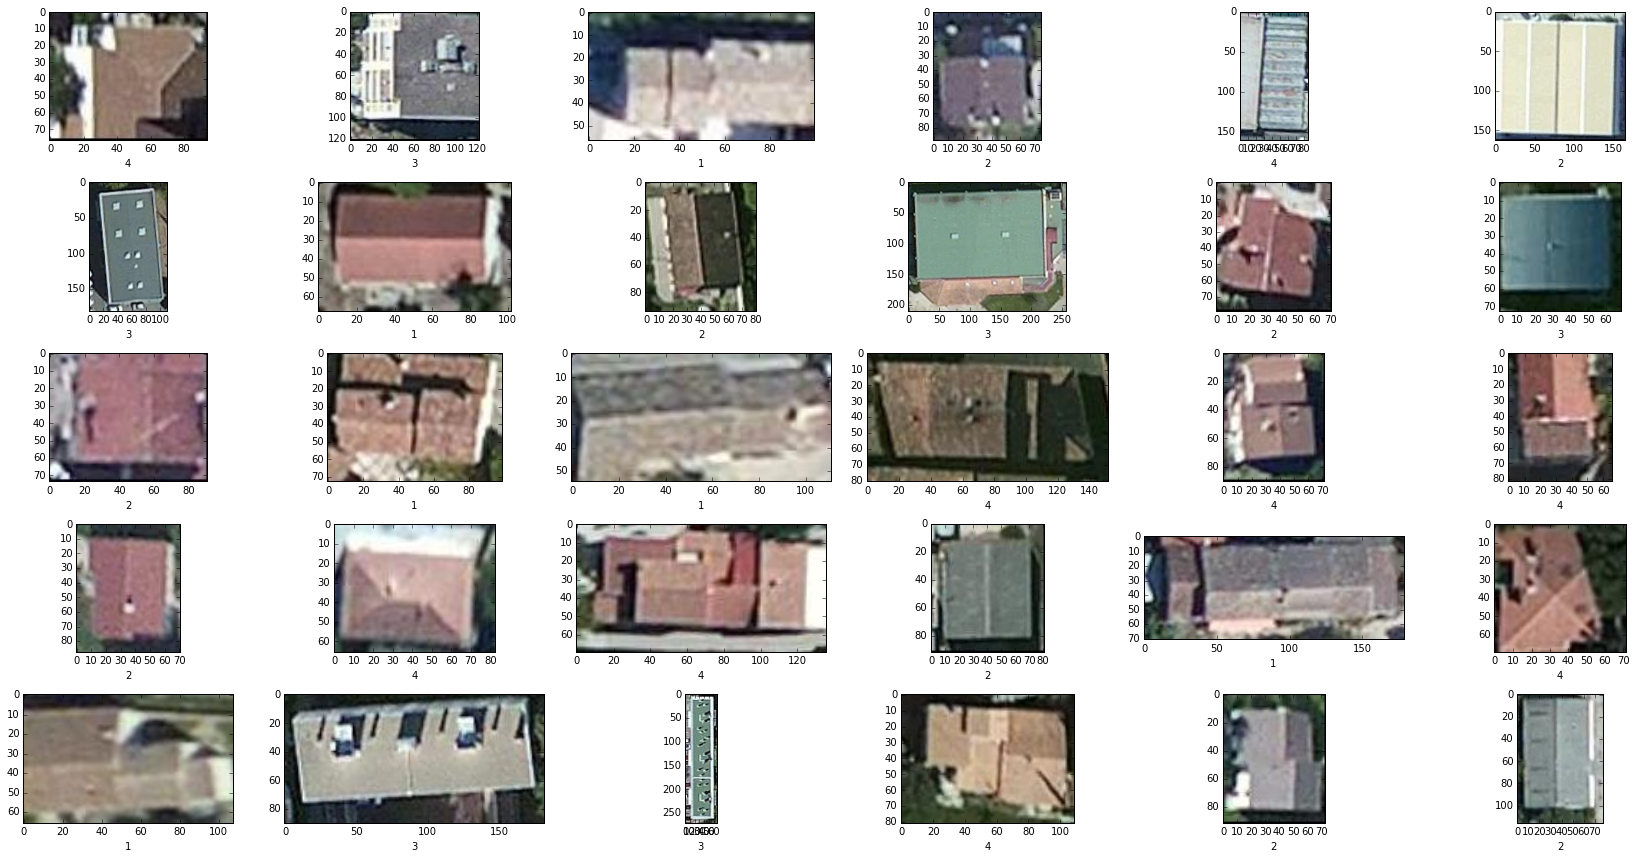

In [85]:
view_random(5,6, ids, figsize= (24,12))